# 1. Gerekli Kütüphaneleri İçe Aktarma

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Yapay Veri Üretimi

In [5]:
np.random.seed(42)  # Rastgelelik için sabit tohum

n = 500  # Kişi sayısı
ages = np.random.randint(18, 65, size=n)
genders = np.random.choice(['Kadın', 'Erkek'], size=n)
education_levels = np.random.choice(['Lise', 'Üniversite', 'Yüksek Lisans'], size=n, p=[0.3, 0.5, 0.2])
incomes = np.random.normal(15000, 5000, size=n).astype(int)
social_media_hours = np.clip(np.random.normal(3, 1.5, size=n), 0, 10)
heard_about_product = np.random.choice([0, 1], size=n, p=[0.4, 0.6])
campaign_offer = np.random.choice([0, 1], size=n, p=[0.5, 0.5])

# Satın alma ihtimali (basit kural + rastlantı)
purchase_prob = (
    0.2 * (ages > 30) +
    0.3 * (incomes > 17000) +
    0.2 * heard_about_product +
    0.3 * campaign_offer +
    np.random.normal(0, 0.1, size=n)
)
purchase = (purchase_prob > 0.5).astype(int)


# 3. Veri Çerçevesi Oluşturma

In [51]:
df = pd.DataFrame({
    'Yaş': ages,
    'Cinsiyet': genders,
    'Eğitim': education_levels,
    'Gelir': incomes,
    'SosyalMedyaSaat': social_media_hours,
    'BilgiVarMı': heard_about_product,
    'KampanyaVar': campaign_offer,
    'SatınAldı': purchase
})

df.head()

,Yaş,Cinsiyet,Eğitim,Gelir,SosyalMedyaSaat,BilgiVarMı,KampanyaVar,SatınAldı
0,56,Kadın,Üniversite,16014,2.977035,1,0,0
1,46,Kadın,Lise,7421,3.868937,1,0,0
2,32,Kadın,Yüksek Lisans,22737,3.179371,0,0,1
3,60,Kadın,Yüksek Lisans,23979,1.540397,1,1,1
4,25,Kadın,Lise,11936,4.794857,0,1,0


# 4. Kategorik Değişkenleri Sayısala Çevirme

In [11]:
df_encoded = pd.get_dummies(df, columns=['Cinsiyet', 'Eğitim'], drop_first=True)

# 5. Modelleme (Random Forest)

In [14]:
X = df_encoded.drop('SatınAldı', axis=1)
y = df_encoded['SatınAldı']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# 6. Performans Değerlendirmesi

In [17]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        47
           1       0.83      0.94      0.88        53

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



# 7. Öznitelik Önem Sıralaması

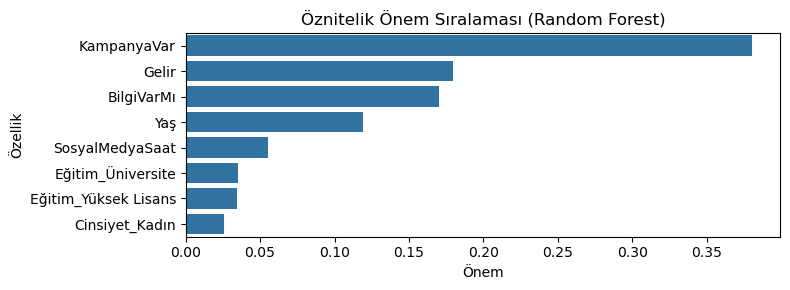

In [53]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Özellik': features, 'Önem': importances}).sort_values(by='Önem', ascending=False)

# Görselleştirme
plt.figure(figsize=(8, 3))
sns.barplot(x='Önem', y='Özellik', data=importance_df)
plt.title('Öznitelik Önem Sıralaması (Random Forest)')
plt.tight_layout()
plt.show()


# Farklı Modellerle Karşılaştırma

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Karşılaştırılacak modeller
models = {
    'Lojistik Regresyon': LogisticRegression(max_iter=1000),
    'KNN (K=5)': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Eğitim ve değerlendirme
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} doğruluk skoru: {acc:.2f}")


Lojistik Regresyon doğruluk skoru: 0.87
KNN (K=5) doğruluk skoru: 0.64
Random Forest doğruluk skoru: 0.87


C:\Users\Sefa\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:43:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost doğruluk skoru: 0.84


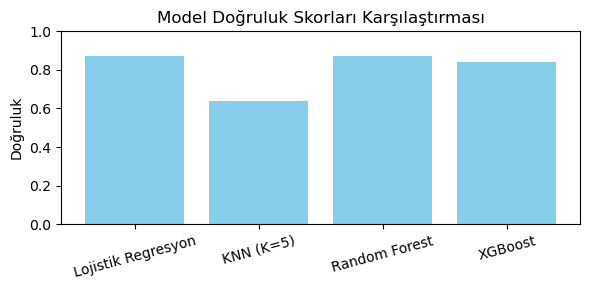

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Doğruluk Skorları Karşılaştırması')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# Random Forest Model Optimizasyonu

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parametre ızgarası
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV ile arama
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5 katlı çapraz doğrulama
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Eğitim
grid_search.fit(X_train, y_train)

# En iyi parametreler ve skor
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk skoru:", grid_search.best_score_)

# En iyi model ile test seti değerlendirmesi
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_optimized))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
En iyi doğruluk skoru: 0.8825000000000001
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        47
           1       0.84      0.92      0.88        53

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



# Satın Alma Olasılığı Dağılımı

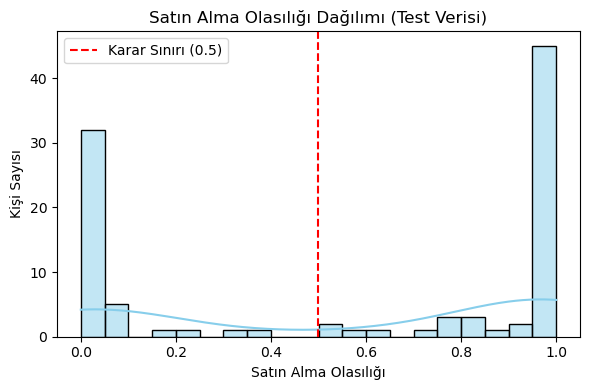

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Test setindeki tahmin olasılıkları (1 sınıfı için)
y_proba = model.predict_proba(X_test)[:, 1]  # 1'e ait olasılık

# Histogram + yoğunluk grafiği
plt.figure(figsize=(6, 4))
sns.histplot(y_proba, bins=20, kde=True, color='skyblue')
plt.title("Satın Alma Olasılığı Dağılımı (Test Verisi)")
plt.xlabel("Satın Alma Olasılığı")
plt.ylabel("Kişi Sayısı")
plt.axvline(0.5, color='red', linestyle='--', label='Karar Sınırı (0.5)')
plt.legend()
plt.tight_layout()
plt.show()


# Kampanya Varlığına Göre Olasılık Dağılımı

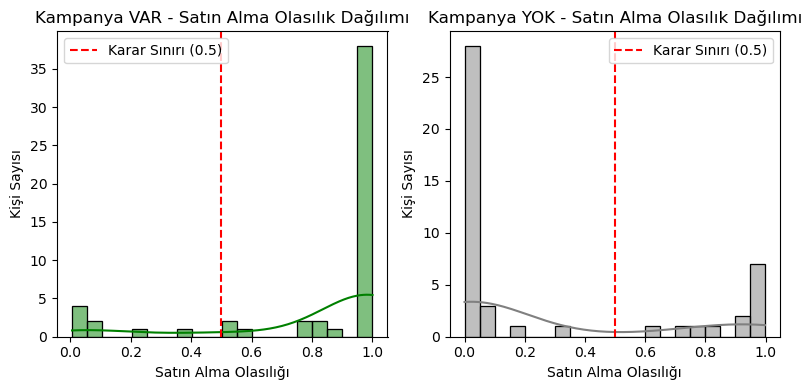

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Kampanya bilgisine göre test verilerini ayır
X_test_with_campaign = X_test[X_test['KampanyaVar'] == 1]
X_test_without_campaign = X_test[X_test['KampanyaVar'] == 0]

# 2. Her grup için satın alma olasılıklarını hesapla
proba_with_campaign = model.predict_proba(X_test_with_campaign)[:, 1]
proba_without_campaign = model.predict_proba(X_test_without_campaign)[:, 1]

# 3. Görselleştirme: yan yana iki grafik
plt.figure(figsize=(8, 4))

# 3.1 Kampanya VAR
plt.subplot(1, 2, 1)
sns.histplot(proba_with_campaign, bins=20, kde=True, color='green')
plt.axvline(0.5, color='red', linestyle='--', label='Karar Sınırı (0.5)')
plt.title("Kampanya VAR - Satın Alma Olasılık Dağılımı")
plt.xlabel("Satın Alma Olasılığı")
plt.ylabel("Kişi Sayısı")
plt.legend()

# 3.2 Kampanya YOK
plt.subplot(1, 2, 2)
sns.histplot(proba_without_campaign, bins=20, kde=True, color='gray')
plt.axvline(0.5, color='red', linestyle='--', label='Karar Sınırı (0.5)')
plt.title("Kampanya YOK - Satın Alma Olasılık Dağılımı")
plt.xlabel("Satın Alma Olasılığı")
plt.ylabel("Kişi Sayısı")
plt.legend()

plt.tight_layout()
plt.show()
